<h1>Udacity Self-Driving Car Nanodegree Program</h1>


<h2>Advanced Lane Finding Project</h2>
    
<b>The steps of this project are the following::</b>

<ol>
    <li>Compute the camera calibration matrix and distortion coefficients given a set of chessboard images.</li>
    <li>Apply a distortion correction to raw images.</li>
    <li>Use color transforms, gradients, etc., to create a thresholded binary image.</li>
    <li>Apply a perspective transform to binary image ("birds-eye view").</li>
    <li>Detect lane pixels and fit to find the lane boundary.</li>
    <li>Determine the curvature of the lane and vehicle position with respect to center.</li>
    <li>Warp the detected lane boundaries back onto the original image.</li>
    <li>Output visual display of the lane boundaries and numerical estimation of lane curvature and vehicle position.</li>
</ol>

In [1]:
# import all needed libraries
import numpy as np 
import cv2 
import glob
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline

<h4>Camera Calibration</h4>

In [29]:
nx = 9
ny = 6
img_dir_path = './camera_cal/calibration*.jpg'

def find_img_obj_points():
    # prepare object points like (0,0,0), (1,0,0), ..., (8,5,0)
    objp = np.zeros((ny*nx,3), np.float32)
    objp[:,:2] = np.mgrid[0:nx,0:ny].T.reshape(-1,2) #x,y coordinates 

    # Arrays to store object points and image points from all the images.
    objpoints = [] # 3d points in real world space
    imgpoints = [] # 2d points in image plane.
    img_size = []
    # Make a list of calibration images
    images = glob.glob(img_dir_path)
    # create a figure for plotting imgs
    f, axes = plt.subplots(1,2,figsize=(30,30))
    # Step through the list and search for chessboard corners
    for i, fname in enumerate(images):
        origin_img = cv2.imread(fname)
        if i==2: 
            img_size.append((origin_img.shape[0],origin_img.shape[1]))
            # Plotting the original Image
            axes[0].set_title('Original Image', fontsize=20)
            axes[0].imshow(origin_img)
        gray = cv2.cvtColor(origin_img, cv2.COLOR_BGR2GRAY)
        # Find the chessboard corners in distorted img
        ret, corners = cv2.findChessboardCorners(gray, (nx,ny),None)
        
        # If found, add object points, image points
        if ret == True:
            objpoints.append(objp)
            imgpoints.append(corners)
            # Draw and display the corners
            cv2.drawChessboardCorners(origin_img, (nx,ny), corners, ret)
            if i==2: 
                # Plotting original Image with Chessboard Corners
                axes[1].set_title('Image with Chessboard Corners', fontsize=20)
                axes[1].imshow(origin_img)
        
    return objpoints, imgpoints, img_size[0]

In [35]:
def calc_calibration_params():
    """Calculate and return camera matrix and distortion coefficients."""
    obj_points, img_points, img_shape = find_img_obj_points()
    ret, mtx, dist, rvecs, tvecs = cv2.calibrateCamera(obj_points, img_points, img_shape, None, None)
    return mtx, dist

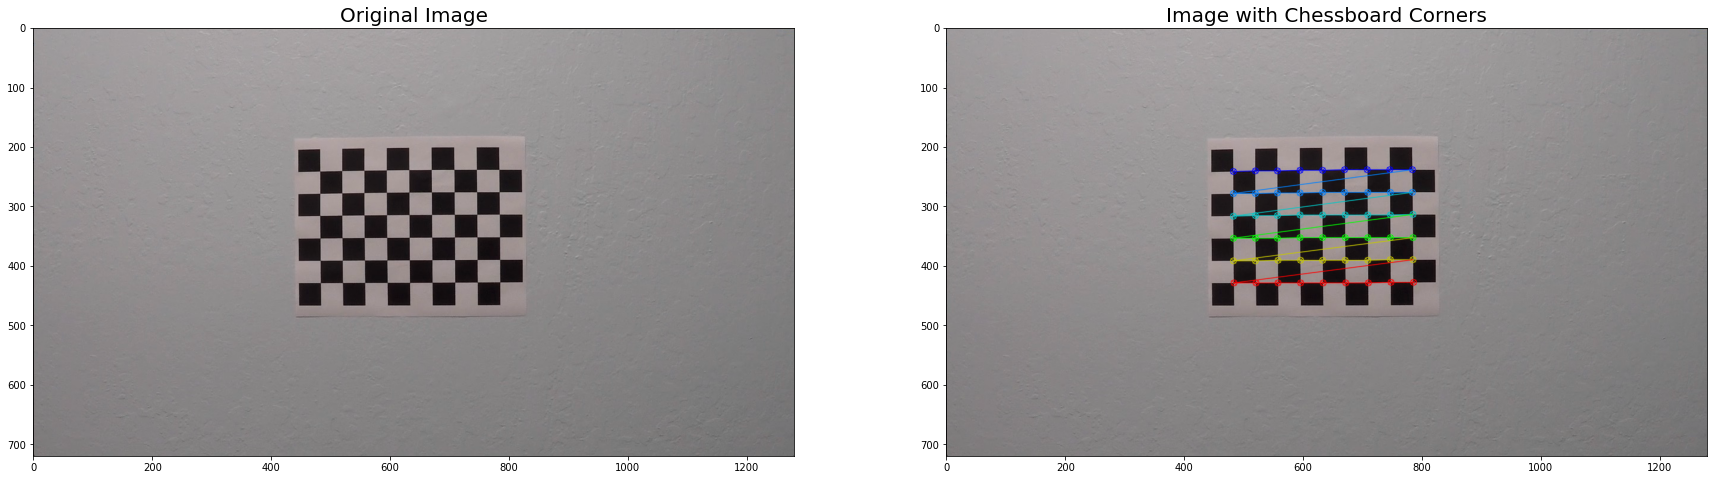

In [36]:
x,y = calc_calibration_params()

In [37]:
def undistort_image(image):

    mtx, dist = calc_calibration_params()
    dst_img = cv2.undistort(image, mtx, dist, None, mtx)
    return dst_img